<a href="https://colab.research.google.com/github/GoradiaNishant/Deep-Learning/blob/main/case_study_UNet_vs_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unet

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
img_width = 128
img_height = 128
img_channels = 3

In [ ]:
inputs = tf.keras.layers.Input((img_width,img_height,img_channels))

Model architecture initialization
**Down path**


In [ ]:
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [ ]:
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

In [ ]:
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

In [ ]:
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

In [ ]:
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

In [ ]:
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

**Expansive Path**

In [ ]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [ ]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [ ]:
u8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [ ]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [ ]:
outputs = tf.keras.layers.Conv2D(1, (1,1), activation = 'sigmoid')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nucle.h5', verbose=1, save_best_only=True)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images

/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images'

In [ ]:
w, h = 128,128

In [ ]:
import os
ids = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images"))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  100


In [ ]:
import glob
train = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/*"))
train_mask = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_segmentation/*.png"))
print(f'Total Train Images : {len(train)}\nTotal Mask Image : {len(train_mask)}')

Total Train Images : 100
Total Mask Image : 100


In [ ]:
import numpy as np
X = np.zeros((len(train), h, w, 3), dtype=np.float32)
y = np.zeros((len(train_mask), h, w, 1), dtype=np.float32)

In [ ]:
from tqdm.notebook import trange, tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
for n, (img, mimg) in tqdm(enumerate(zip(train, train_mask))):
  ##print(n, img, mimg)
  # Load images
  img = load_img(img)
  x_img = img_to_array(img)
  x_img = resize(x_img, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask = img_to_array(load_img(mimg, color_mode = "grayscale"))
  mask = resize(mask, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X[n] = x_img/255.0
  y[n] = mask/255.0

0it [00:00, ?it/s]

In [ ]:
# Save the files in Numpy array for reusability
# np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy', X)
# np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy', y)
# print(X.shape, y.shape)
X = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy')
print(X.shape, y.shape)

(100, 128, 128, 3) (100, 128, 128, 1)


In [ ]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 128, 128, 3) (80, 128, 128, 1) (20, 128, 128, 3) (20, 128, 128, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


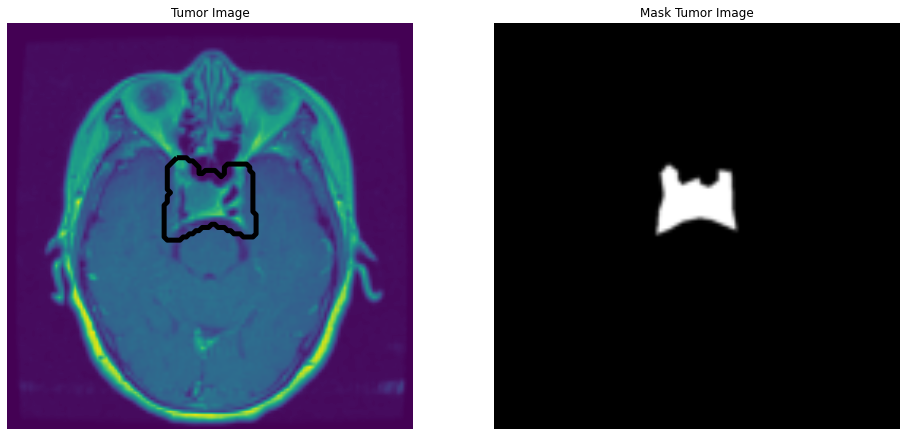

In [ ]:
# Visualize any randome image along with the mask
import random
import matplotlib.pyplot as plt
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 10))

ax1.imshow(X_train[ix, ..., 0], interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Tumor Image')
ax1.set_axis_off()
ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Mask Tumor Image')
ax2.set_axis_off()

In [ ]:
result = model.fit(X_train, y_train, batch_size=2, epochs=100, callbacks=callbacks, validation_data=(X_test, y_test), use_multiprocessing=True, workers = 31, verbose=2)

Epoch 1/100
40/40 - 5s - loss: 0.3304 - accuracy: 0.7820 - val_loss: 0.1659 - val_accuracy: 0.8099 - 5s/epoch - 135ms/step
Epoch 2/100
40/40 - 1s - loss: 0.1695 - accuracy: 0.7874 - val_loss: 0.1212 - val_accuracy: 0.8099 - 1s/epoch - 27ms/step
Epoch 3/100
40/40 - 1s - loss: 0.1556 - accuracy: 0.7874 - val_loss: 0.1724 - val_accuracy: 0.8099 - 1s/epoch - 28ms/step
Epoch 4/100
40/40 - 1s - loss: 0.1478 - accuracy: 0.7874 - val_loss: 0.1149 - val_accuracy: 0.8099 - 1s/epoch - 28ms/step
Epoch 5/100
40/40 - 1s - loss: 0.1402 - accuracy: 0.7874 - val_loss: 0.1151 - val_accuracy: 0.8099 - 1s/epoch - 28ms/step
Epoch 6/100
40/40 - 1s - loss: 0.1468 - accuracy: 0.7874 - val_loss: 0.1260 - val_accuracy: 0.8099 - 1s/epoch - 28ms/step
Epoch 7/100
40/40 - 1s - loss: 0.1398 - accuracy: 0.7874 - val_loss: 0.1105 - val_accuracy: 0.8099 - 1s/epoch - 28ms/step
Epoch 8/100
40/40 - 1s - loss: 0.1392 - accuracy: 0.7874 - val_loss: 0.1255 - val_accuracy: 0.8099 - 1s/epoch - 28ms/step
Epoch 9/100
40/40 - 1s 

In [ ]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('tumor Image')
    ax[0].set_axis_off()

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('tumor Mask Image')
    ax[1].set_axis_off()

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Segmented image')
    ax[2].set_axis_off()
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('tumor Mask binary Image');
    ax[3].set_axis_off()    

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 441ms/step - loss: 0.1204 - accuracy: 0.8099


[0.12039482593536377, 0.8099365234375]

In [ ]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 28ms/step


In [ ]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


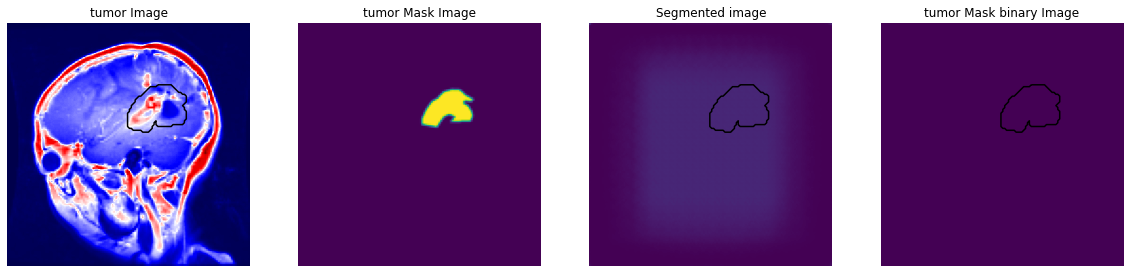

In [ ]:
plot_sample(X_test, y_test, preds_val, preds_val_t,18)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


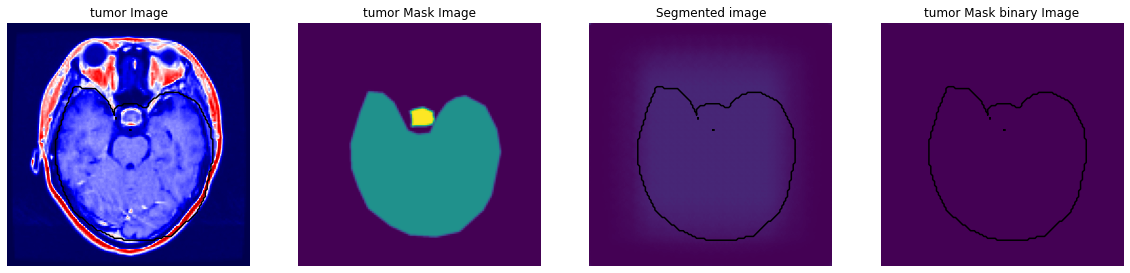

In [ ]:
plot_sample(X_test, y_test, preds_val, preds_val_t)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

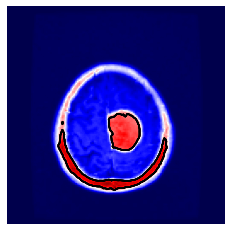

In [ ]:
fileloc = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg" #@param ["/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg"]

def predictImage(fileloc):
  X1 = np.zeros((len(train), h, w, 3), dtype=np.float32)
  y1 = np.zeros((len(train), h, w, 1), dtype=np.float32)

  # Load images
  img1 = load_img(fileloc)
  img2 = load_img(fileloc, color_mode = "grayscale")

  x_img1 = img_to_array(img1)
  x_img1 = resize(x_img1, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask1 = img_to_array(img2)
  mask1 = resize(mask1, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X1[0] = x_img1/255.0
  y1[0] = mask1/255.0

  ## show imagespv = new_model.predict(X1, verbose=1)
  pr = new_model.predict(X1)

  has_mask = y1[0].max() > 0
  # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # ax[0].imshow(X1[0, ..., 0], cmap='seismic')
  # ax[1].contour(y[0].squeeze(), colors='k', levels=[0.5])

  # fig, ax = plt.subplots(1, 2, figsize=(14, 7))
  plt.imshow(X1[0, ..., 0], cmap='seismic')
  if has_mask:
      plt.contour(y1[0].squeeze(), colors='k', levels=[0.5])
  plt.axis('off')

  # plt.set_title('tumor Image')
  # plt.set_axis_off()
  # pv_t = (pr > 0.5).astype(np.uint8)

  # plot_sample(X1, y1, pr, pv_t,0)

for i in range(6):
  predictImage(fileloc)

In [ ]:
# new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

from google.colab.patches import cv2_imshow
import cv2

cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/0001-0193.mkv')
i=0
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
      break
    
    cv2_imshow(frame)
    i+=1
 
cap.release()
cv2.destroyAllWindows()

# Resnet

Model architecture initialization
**Down path for ResUnet**


In [ ]:
!pip install -q -U tensorflow_addons

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import tensorflow_addons as tfa

In [ ]:
img_width = 128
img_height = 128
img_channels = 3

In [ ]:
inputs1 = tf.keras.layers.Input((img_width,img_height,img_channels))

In [ ]:
ress = tf.keras.layers.Lambda(lambda x: x / 255)(inputs1)

In [ ]:
resc1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(ress)
resc1 = tf.keras.layers.BatchNormalization()(resc1)
resc1 = tf.keras.layers.Activation(activation='relu')(resc1)
resc1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc1)
resc1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc1)
resc1 = tf.keras.layers.BatchNormalization()(resc1)
resc1 = tf.keras.layers.Activation(activation='relu')(resc1)
resp1 = tf.keras.layers.MaxPooling2D((2,2))(resc1)

In [ ]:
resc2 = tf.keras.layers.BatchNormalization()(resp1)
resc2 = tf.keras.layers.Activation(activation='relu')(resc2)
resc2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc2)
resc2 = tf.keras.layers.BatchNormalization()(resc2)
resc2 = tf.keras.layers.Activation(activation='relu')(resc2)
resc2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc2)
resc2 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc2)
resc2 = tf.keras.layers.BatchNormalization()(resc2)
resc2 = tf.keras.layers.Activation(activation='relu')(resc2)
resp2 = tf.keras.layers.MaxPooling2D((2,2))(resc2)

In [ ]:
resc3 = tf.keras.layers.BatchNormalization()(resp2)
resc3 = tf.keras.layers.Activation(activation='relu')(resc3)
resc3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc3)
resc3 = tf.keras.layers.BatchNormalization()(resc3)
resc3 = tf.keras.layers.Activation(activation='relu')(resc3)
resc3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc3)
resc3 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc3)
resc3 = tf.keras.layers.BatchNormalization()(resc3)
resc3 = tf.keras.layers.Activation(activation='relu')(resc3)
resp3 = tf.keras.layers.MaxPooling2D((2,2))(resc3)

In [ ]:
resc4 = tf.keras.layers.BatchNormalization()(resp3)
resc4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc4)
resc4 = tf.keras.layers.BatchNormalization()(resc4)
resc4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc4)
resc4 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc4)
resc4 = tf.keras.layers.BatchNormalization()(resc4)
resp4 = tf.keras.layers.MaxPooling2D((2,2))(resc4)

In [ ]:
resc5 = tf.keras.layers.BatchNormalization()(resp4)
resc5 = tf.keras.layers.Activation(activation='relu')(resc5)
resc5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc5)
resc5 = tf.keras.layers.BatchNormalization()(resc5)
resc5 = tf.keras.layers.Activation(activation='relu')(resc5)
resc5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc5)
resc5 = tf.keras.layers.Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc5)
resc5 = tf.keras.layers.BatchNormalization()(resc5)
resc5 = tf.keras.layers.Activation(activation='relu')(resc5)

**Expansive Path**

In [ ]:
resu6 = tf.keras.layers.Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(resc5)
resu6 = tf.keras.layers.concatenate([resu6,resc4])

resc6 = tf.keras.layers.BatchNormalization()(resu6)
resc6 = tf.keras.layers.Activation(activation='relu')(resc6)
resc6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc6)
resc6 = tf.keras.layers.BatchNormalization()(resc6)
resc6 = tf.keras.layers.Activation(activation='relu')(resc6)
resc6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc6)
resc6 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc6)
resc6 = tf.keras.layers.BatchNormalization()(resc6)
resc6 = tf.keras.layers.Activation(activation='relu')(resc6)

In [ ]:
resu7 = tf.keras.layers.Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(resc6)
resu7 = tf.keras.layers.concatenate([resu7,resc3])

resc7 = tf.keras.layers.BatchNormalization()(resu7)
resc7 = tf.keras.layers.Activation(activation='relu')(resc7)
resc7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc7)
resc7 = tf.keras.layers.BatchNormalization()(resc7)
resc7 = tf.keras.layers.Activation(activation='relu')(resc7)
resc7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc7)
resc7 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc7)
resc7 = tf.keras.layers.BatchNormalization()(resc7)
resc7 = tf.keras.layers.Activation(activation='relu')(resc7)

In [ ]:
resu8 = tf.keras.layers.Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(resc7)
resu8 = tf.keras.layers.concatenate([resu8,resc2])

resc8 = tf.keras.layers.BatchNormalization()(resu8)
resc8 = tf.keras.layers.Activation(activation='relu')(resc8)
resc8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc8)
resc8 = tf.keras.layers.BatchNormalization()(resc8)
resc8 = tf.keras.layers.Activation(activation='relu')(resc8)
resc8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc8)
resc8 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc8)
resc8 = tf.keras.layers.BatchNormalization()(resc8)
resc8 = tf.keras.layers.Activation(activation='relu')(resc8)

In [ ]:
resu9 = tf.keras.layers.Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(resc8)
resu9 = tf.keras.layers.concatenate([resu9,resc1], axis=3)

resc9 = tf.keras.layers.BatchNormalization()(resu9)
resc9 = tf.keras.layers.Activation(activation='relu')(resc9)
resc9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc9)
resc9 = tf.keras.layers.BatchNormalization()(resc9)
resc9 = tf.keras.layers.Activation(activation='relu')(resc9)
resc9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc9)
resc9 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(resc9)
resc9 = tf.keras.layers.BatchNormalization()(resc9)
resc9 = tf.keras.layers.Activation(activation='relu')(resc9)

In [ ]:
outputs1 = tf.keras.layers.Conv2D(1, (1,1), activation = 'sigmoid')(resc9)

In [ ]:
checkpointer1 = tf.keras.callbacks.ModelCheckpoint('model_for_nucle.h5', verbose=1, save_best_only=True)

callbacks1 = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=8, verbose=0,mode='min'),tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [ ]:
model1 = tf.keras.Model(inputs=[inputs1], outputs=[outputs1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images

/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images


In [ ]:
w, h = 128,128

In [ ]:
import os
ids = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images"))[2] # list of names all images in the given path
print("No. of images = ", len(ids))

No. of images =  100


In [ ]:
import glob
train = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/*"))
train_mask = sorted(glob.glob("/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_segmentation/*.png"))
print(f'Total Train Images : {len(train)}\nTotal Mask Image : {len(train_mask)}')

Total Train Images : 100
Total Mask Image : 100


In [ ]:
import numpy as np
X = np.zeros((len(train), h, w, 3), dtype=np.float32)
y = np.zeros((len(train_mask), h, w, 1), dtype=np.float32)

In [ ]:
from tqdm.notebook import trange, tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
for n, (img, mimg) in tqdm(enumerate(zip(train, train_mask))):
  ##print(n, img, mimg)
  # Load images
  img = load_img(img)
  x_img = img_to_array(img)
  x_img = resize(x_img, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask = img_to_array(load_img(mimg, color_mode = "grayscale"))
  mask = resize(mask, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X[n] = x_img/255.0
  y[n] = mask/255.0

0it [00:00, ?it/s]

In [ ]:
# Save the files in Numpy array for reusability
# np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy', X)
# np.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy', y)
# print(X.shape, y.shape)
X = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/X1.npy')
y = np.load('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/y1.npy')
print(X.shape, y.shape)

(100, 128, 128, 3) (100, 128, 128, 1)


In [ ]:
# Split train and valid
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 128, 128, 3) (80, 128, 128, 1) (20, 128, 128, 3) (20, 128, 128, 1)


**Model with CLR**

In [ ]:
BATCH_SIZE = 64
EPOCHS = 10
INIT_LR = 1e-4
MAX_LR = 1e-2

learning_rate = 0.1
decay_rate = learning_rate / EPOCHS
momentum = 0.8

# optimizers
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
adam= tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=100)

# clr
steps_per_epoch = len(X_train)
clr = tfa.optimizers.CyclicalLearningRate(initial_learning_rate=INIT_LR,
    maximal_learning_rate=MAX_LR,
    scale_fn=lambda x: 1/(2.**(x-1)),
    step_size=2 * steps_per_epoch
)
optimizer = tf.keras.optimizers.SGD(clr)

model1.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
result1 = model1.fit(X_train, y_train, batch_size=2, epochs=100, callbacks=callbacks1, validation_data=(X_test, y_test), use_multiprocessing=True, workers = 31, verbose=2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
40/40 - 5s - loss: 0.5329 - accuracy: 0.7152 - val_loss: 0.6850 - val_accuracy: 0.8099 - 5s/epoch - 133ms/step
Epoch 2/100
40/40 - 2s - loss: 0.5053 - accuracy: 0.7329 - val_loss: 0.6628 - val_accuracy: 0.8099 - 2s/epoch - 40ms/step
Epoch 3/100
40/40 - 2s - loss: 0.4513 - accuracy: 0.7530 - val_loss: 0.6311 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 4/100
40/40 - 2s - loss: 0.3872 - accuracy: 0.7727 - val_loss: 0.5949 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 5/100
40/40 - 2s - loss: 0.3225 - accuracy: 0.7824 - val_loss: 0.5662 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 6/100
40/40 - 2s - loss: 0.2878 - accuracy: 0.7847 - val_loss: 0.5490 - val_accuracy: 0.8099 - 2s/epoch - 40ms/step
Epoch 7/100
40/40 - 2s - loss: 0.2685 - accuracy: 0.7855 - val_loss: 0.5398 - val_accuracy: 0.8099 - 2s/epoch - 40ms/step
Epoch 8/100
40/40 - 2s - loss: 0.2589 - accuracy: 0.7857 - val_loss: 0.5366 - val_accuracy: 0.8099 - 2s/epoch - 39ms/step
Epoch 9/100
40/40 - 2s 

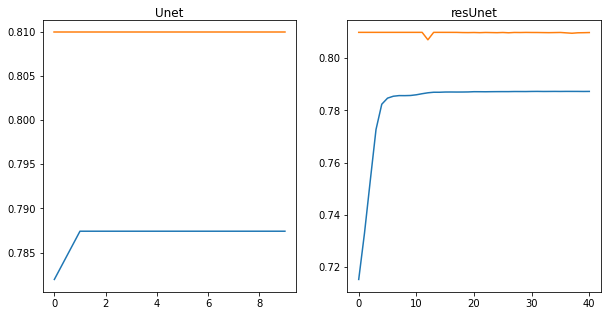

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))

#plot 1:
plt.subplot(1, 2, 1)
plt.title('Unet', pad=-50)
plt.plot(result.history['accuracy'], label='train')
plt.plot(result.history['val_accuracy'], label='test')

#plot 2:
plt.subplot(1, 2, 2)
plt.title('resUnet', pad=-50)
plt.plot(result1.history['accuracy'], label='train')
plt.plot(result1.history['val_accuracy'], label='test')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: No contour levels were found within the data range.
  if sys.path[0] == '':


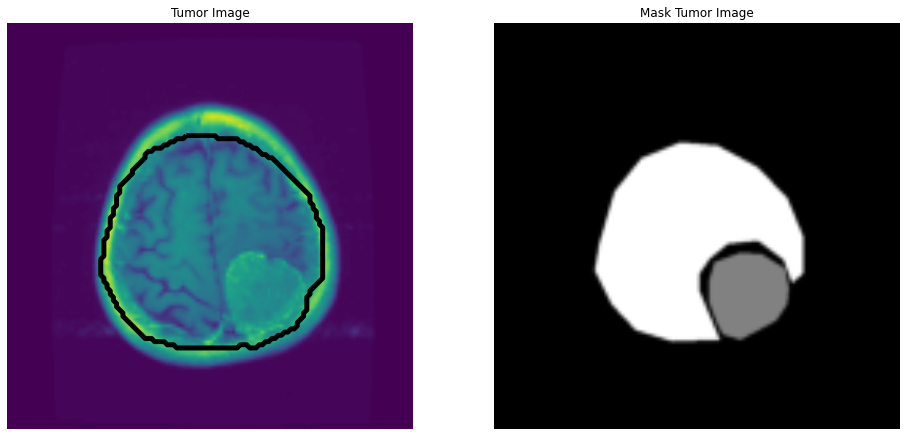

In [ ]:
# Visualize any randome image along with the mask
import random
import matplotlib.pyplot as plt
ix = random.randint(0, len(X_train))
has_mask = y_train[ix].max() > 0 # salt indicator

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 10))

ax1.imshow(X_train[ix, ..., 0], interpolation = 'bilinear')
if has_mask: # if salt
    # draw a boundary(contour) in the original image separating salt and non-salt areas
    ax1.contour(y_train[ix].squeeze(), colors = 'k', linewidths = 5, levels = [0.5])
ax1.set_title('Tumor Image')
ax1.set_axis_off()
ax2.imshow(y_train[ix].squeeze(), cmap = 'gray', interpolation = 'bilinear')
ax2.set_title('Mask Tumor Image')
ax2.set_axis_off()

In [ ]:
def plot_sample(X, y, preds, binary_preds, ix=None):
    """Function to plot the results"""
    if ix is None:
        ix = random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='seismic')
    if has_mask:
        ax[0].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[0].set_title('tumor Image')
    ax[0].set_axis_off()

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('tumor Mask Image')
    ax[1].set_axis_off()

    ax[2].imshow(preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[2].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Segmented image')
    ax[2].set_axis_off()
    
    ax[3].imshow(binary_preds[ix].squeeze(), vmin=0, vmax=1)
    if has_mask:
        ax[3].contour(y[ix].squeeze(), colors='k', levels=[0.5])
    ax[3].set_title('tumor Mask binary Image');
    ax[3].set_axis_off()    

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 1s 1s/step - loss: 0.1125 - accuracy: 0.8099


[0.11247676610946655, 0.8099365234375]

In [ ]:
# Predict on train, val and test
preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 37ms/step


In [ ]:
# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


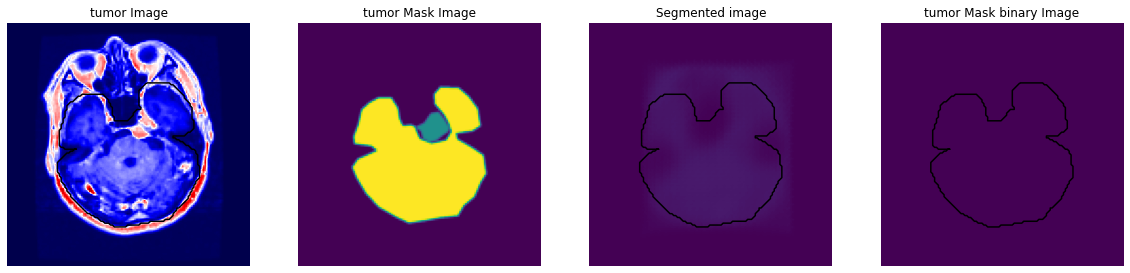

In [ ]:
plot_sample(X_test, y_test, preds_val, preds_val_t,17)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: No contour levels were found within the data range.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: No contour levels were found within the data range.


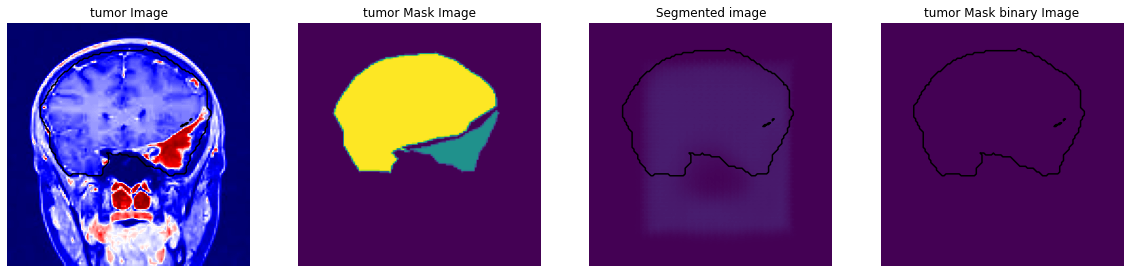

In [ ]:
plot_sample(X_test, y_test, preds_val, preds_val_t)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model') 

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/trained_model')

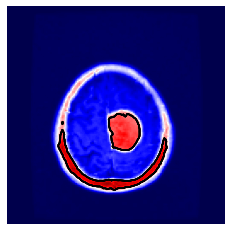

In [ ]:
fileloc = "/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg" #@param ["/content/drive/MyDrive/Colab Notebooks/Deep Learning/training images/train_images/61.jpg"]

def predictImage(fileloc):
  X1 = np.zeros((len(train), h, w, 3), dtype=np.float32)
  y1 = np.zeros((len(train), h, w, 1), dtype=np.float32)

  # Load images
  img1 = load_img(fileloc)
  img2 = load_img(fileloc, color_mode = "grayscale")

  x_img1 = img_to_array(img1)
  x_img1 = resize(x_img1, (h, w, 3), mode = 'constant', preserve_range = True)
  # # Load masks
  mask1 = img_to_array(img2)
  mask1 = resize(mask1, (h, w, 1), mode = 'constant', preserve_range = True)
  # # Save images
  X1[0] = x_img1/255.0
  y1[0] = mask1/255.0

  ## show imagespv = new_model.predict(X1, verbose=1)
  pr = new_model.predict(X1)

  has_mask = y1[0].max() > 0
  # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # ax[0].imshow(X1[0, ..., 0], cmap='seismic')
  # ax[1].contour(y[0].squeeze(), colors='k', levels=[0.5])

  # fig, ax = plt.subplots(1, 2, figsize=(14, 7))
  plt.imshow(X1[0, ..., 0], cmap='seismic')
  if has_mask:
      plt.contour(y1[0].squeeze(), colors='k', levels=[0.5])
  plt.axis('off')

  # plt.set_title('tumor Image')
  # plt.set_axis_off()
  # pv_t = (pr > 0.5).astype(np.uint8)

  # plot_sample(X1, y1, pr, pv_t,0)

for i in range(6):
  predictImage(fileloc)

# Other achitecture for resUnet

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
from keras.backend import int_shape
from keras.models import Model
from keras.layers import Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, UpSampling2D, UpSampling3D, Add, BatchNormalization, Input, Activation, Lambda, Concatenate

img_width = 128
img_height = 128
img_channels = 3

def res_unet(filter_root, depth, n_class=2, input_size=(256, 256, 1), activation='relu', batch_norm=True, final_activation='softmax'):
    """
    Build UNet model with ResBlock.

    Args:
        filter_root (int): Number of filters to start with in first convolution.
        depth (int): How deep to go in UNet i.e. how many down and up sampling you want to do in the model. 
                    Filter root and image size should be multiple of 2^depth.
        n_class (int, optional): How many classes in the output layer. Defaults to 2.
        input_size (tuple, optional): Input image size. Defaults to (256, 256, 1).
        activation (str, optional): activation to use in each convolution. Defaults to 'relu'.
        batch_norm (bool, optional): To use Batch normaliztion or not. Defaults to True.
        final_activation (str, optional): activation for output layer. Defaults to 'softmax'.

    Returns:
        obj: keras model object
    """
    inputs = Input(input_size)
    x = inputs
    # Dictionary for long connections
    long_connection_store = {}

    if len(input_size) == 3:
        Conv = Conv2D
        MaxPooling = MaxPooling2D
        UpSampling = UpSampling2D
    elif len(input_size) == 4:
        Conv = Conv3D
        MaxPooling = MaxPooling3D
        UpSampling = UpSampling3D

    # Down sampling
    for i in range(depth):
        out_channel = 2**i * filter_root

        # Residual/Skip connection
        res = Conv(out_channel, kernel_size=1, padding='same', use_bias=False, name="Identity{}_1".format(i))(x)

        # First Conv Block with Conv, BN and activation
        conv1 = Conv(out_channel, kernel_size=3, padding='same', name="Conv{}_1".format(i))(x)
        if batch_norm:
            conv1 = BatchNormalization(name="BN{}_1".format(i))(conv1)
        act1 = Activation(activation, name="Act{}_1".format(i))(conv1)

        # Second Conv block with Conv and BN only
        conv2 = Conv(out_channel, kernel_size=3, padding='same', name="Conv{}_2".format(i))(act1)
        if batch_norm:
            conv2 = BatchNormalization(name="BN{}_2".format(i))(conv2)

        resconnection = Add(name="Add{}_1".format(i))([res, conv2])

        act2 = Activation(activation, name="Act{}_2".format(i))(resconnection)

        # Max pooling
        if i < depth - 1:
            long_connection_store[str(i)] = act2
            x = MaxPooling(padding='same', name="MaxPooling{}_1".format(i))(act2)
        else:
            x = act2

    # Upsampling
    for i in range(depth - 2, -1, -1):
        out_channel = 2**(i) * filter_root

        # long connection from down sampling path.
        long_connection = long_connection_store[str(i)]

        up1 = UpSampling(name="UpSampling{}_1".format(i))(x)
        up_conv1 = Conv(out_channel, 2, activation='relu', padding='same', name="upConv{}_1".format(i))(up1)

        #  Concatenate.
        up_conc = Concatenate(axis=-1, name="upConcatenate{}_1".format(i))([up_conv1, long_connection])

        #  Convolutions
        up_conv2 = Conv(out_channel, 3, padding='same', name="upConv{}_1".format(i))(up_conc)
        if batch_norm:
            up_conv2 = BatchNormalization(name="upBN{}_1".format(i))(up_conv2)
        up_act1 = Activation(activation, name="upAct{}_1".format(i))(up_conv2)

        up_conv2 = Conv(out_channel, 3, padding='same', name="upConv{}_2".format(i))(up_act1)
        if batch_norm:
            up_conv2 = BatchNormalization(name="upBN{}_2".format(i))(up_conv2)

        # Residual/Skip connection
        res = Conv(out_channel, kernel_size=1, padding='same', use_bias=False, name="upIdentity{}_1".format(i))(up_conc)

        resconnection = Add(name="upAdd{}_1".format(i))([res, up_conv2])

        x = Activation(activation, name="upAct{}_2".format(i))(resconnection)

    # Final convolution
    output = Conv(n_class, 1, padding='same', activation=final_activation, name='output')(x)

    return Model(inputs, outputs=output, name='Res-UNet')

In [ ]:
model=res_unet(16,6,2,(img_width,img_height,img_channels),)

ValueError: ignored